In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [2]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [18]:
import os
import cv2
import numpy as np

X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

# Get the current working directory
current_dir = os.getcwd()
print(f"Current Directory: {current_dir}")

# Adjusted paths
train_folder = os.path.join(current_dir, 'archive', 'Training')
test_folder = os.path.join(current_dir, 'archive', 'Testing')

# Helper function to check and load images
def load_images_from_folder(folder_path, label, image_list, label_list):
    if not os.path.exists(folder_path):
        print(f"Folder not found: {folder_path}")
        return
    print(f"Loading images from: {folder_path}")
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        print(f"Reading file: {file_path}")
        img = cv2.imread(file_path)
        if img is not None:
            img = cv2.resize(img, (image_size, image_size))
            image_list.append(img)
            label_list.append(label)
        else:
            print(f"Failed to read image: {file_path}")

# Load training data
for label in labels:
    folder_path = os.path.join(train_folder, label)
    load_images_from_folder(folder_path, label, X_train, Y_train)

# Load testing data
for label in labels:
    folder_path = os.path.join(test_folder, label)
    load_images_from_folder(folder_path, label, X_train, Y_train)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

print(f"Loaded {len(X_train)} images with labels.")


Current Directory: d:\Desktop\BrainTumor
Loading images from: d:\Desktop\BrainTumor\archive\Training\glioma_tumor
Reading file: d:\Desktop\BrainTumor\archive\Training\glioma_tumor\gg (1).jpg
Reading file: d:\Desktop\BrainTumor\archive\Training\glioma_tumor\gg (10).jpg
Reading file: d:\Desktop\BrainTumor\archive\Training\glioma_tumor\gg (100).jpg
Reading file: d:\Desktop\BrainTumor\archive\Training\glioma_tumor\gg (101).jpg
Reading file: d:\Desktop\BrainTumor\archive\Training\glioma_tumor\gg (102).jpg
Reading file: d:\Desktop\BrainTumor\archive\Training\glioma_tumor\gg (103).jpg
Reading file: d:\Desktop\BrainTumor\archive\Training\glioma_tumor\gg (104).jpg
Reading file: d:\Desktop\BrainTumor\archive\Training\glioma_tumor\gg (105).jpg
Reading file: d:\Desktop\BrainTumor\archive\Training\glioma_tumor\gg (106).jpg
Reading file: d:\Desktop\BrainTumor\archive\Training\glioma_tumor\gg (107).jpg
Reading file: d:\Desktop\BrainTumor\archive\Training\glioma_tumor\gg (108).jpg
Reading file: d:\Des

In [19]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [21]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

Convolutional Neural Network

In [22]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [25]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 84s 975ms/step - accuracy: 0.2710 - loss: 6.2287 - val_accuracy: 0.4524 - val_loss: 1.3056
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 78s 935ms/step - accuracy: 0.4674 - loss: 1.2077 - val_accuracy: 0.5272 - val_loss: 0.9947
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 77s 922ms/step - accuracy: 0.5676 - loss: 1.0223 - val_accuracy: 0.5612 - val_loss: 0.9692
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 77s 930ms/step - accuracy: 0.6240 - loss: 0.8681 - val_accuracy: 0.6395 - val_loss: 0.8646
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.6685 - loss: 0.8292 - val_accuracy: 0.6769 - val_loss: 0.8106
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.6974 - loss: 0.7337 - val_accuracy: 0.6837 - val_loss: 0.7529
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 220s 3s/step - accuracy: 0.7454 - loss: 0.6362 - val_accuracy: 0.7313 - val_loss: 0.6680
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 79s 955ms/step - accuracy: 0.7623 - loss: 0.5952 - val_accuracy: 

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

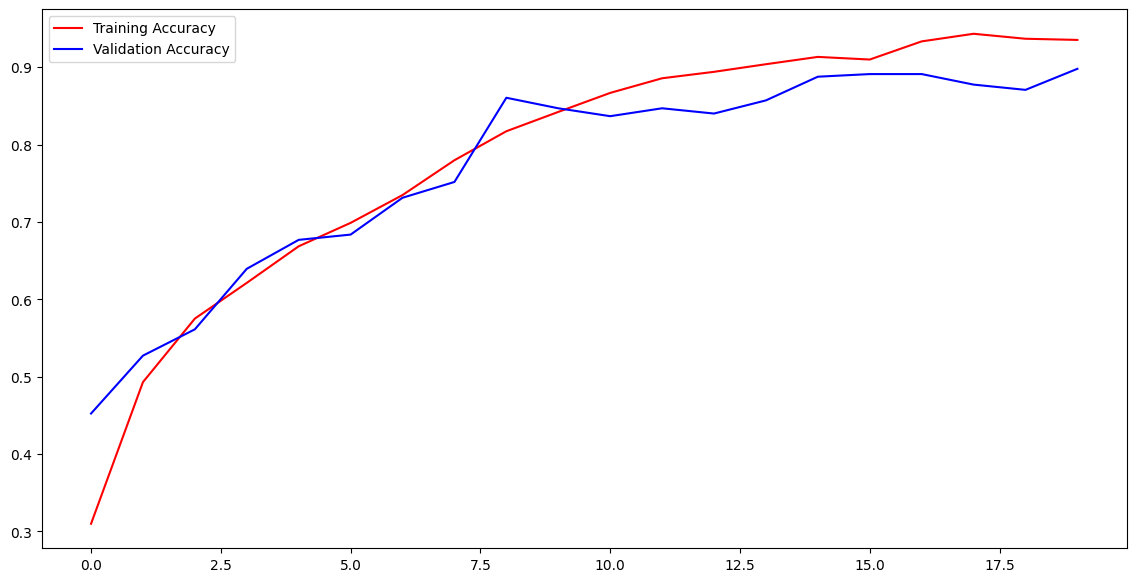

In [27]:
model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

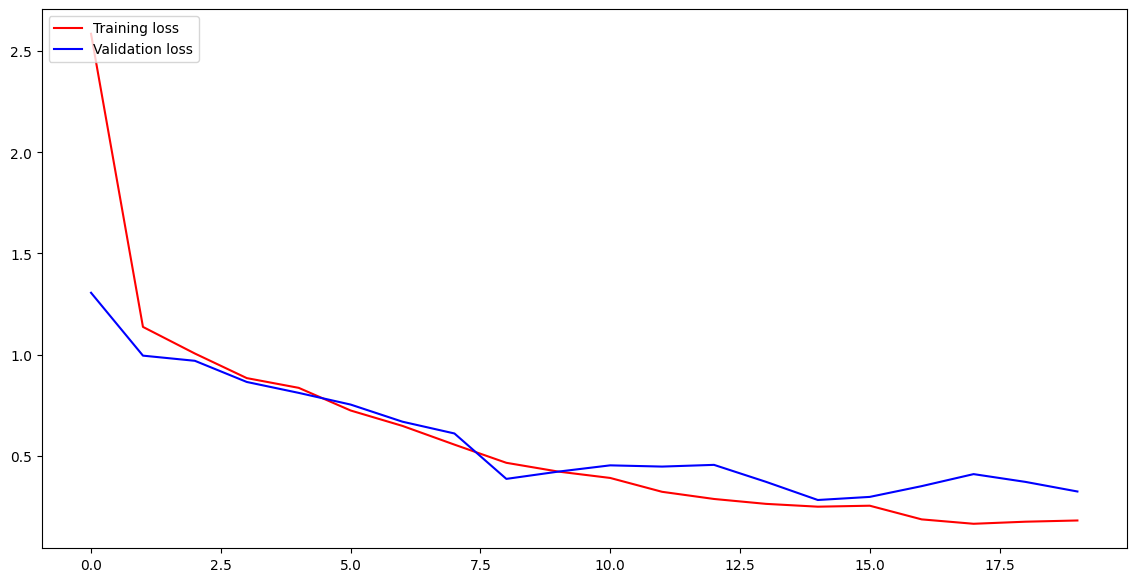

In [28]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [33]:
import cv2

Prediction

In [37]:
import cv2
import numpy as np
import os

# Define the image path
image_path = 'D:/Desktop/BrainTumor/archive/Training/glioma_tumor/gg (1).jpg'

# Check if the file exists
if not os.path.exists(image_path):
    print(f"File not found: {image_path}")
else:
    # Read the image
    img = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if img is None:
        print(f"Failed to load image: {image_path}")
    else:
        # Resize the image
        img = cv2.resize(img, (150, 150))

        # Convert the image to a numpy array
        img_array = np.array(img)
        
        # Print the shape of the array
        print(img_array.shape)


(150, 150, 3)


In [38]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

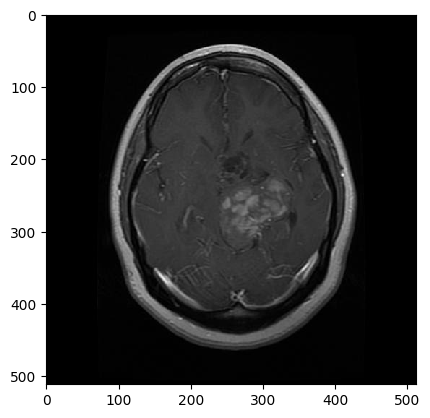

In [40]:
from tensorflow.keras.preprocessing import image
img = image.load_img('D:/Desktop/BrainTumor/archive/Training/glioma_tumor/gg (1).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [41]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


0